# LR Keras Model with Normalization and 100 Epochs and 3 Hidden Layers

In [1]:
from tensorflow import keras
from tensorflow.keras import Sequential
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# read in the dataset
df = pd.read_csv("concrete_data.csv")

In [3]:
# create label and features
label = df.pop("Strength")
df.pop("Age")
features = df.copy()

In [4]:
# normalize the data
stats = features.describe().transpose()
features = (features - stats["mean"]) / stats["std"]

features.describe()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
count,1.030000e+03,1.030000e+03,1030.000000,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,-4.139084e-16,-1.793603e-16,0.000000,-1.379695e-16,-1.931572e-16,7.243397e-16,-4.759946e-16
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.714421e+00,-8.564718e-01,-0.846733,-2.798851e+00,-1.038638e+00,-2.211064e+00,-2.239829e+00
25%,-8.496407e-01,-8.564718e-01,-0.846733,-7.805147e-01,-1.038638e+00,-5.262618e-01,-5.317114e-01
50%,-7.911350e-02,-6.014861e-01,-0.846733,1.607513e-01,3.269920e-02,-6.326279e-02,7.383152e-02
75%,6.586406e-01,8.003558e-01,1.001791,4.885554e-01,6.688058e-01,7.264077e-01,6.288606e-01
max,2.476712e+00,3.309068e+00,2.279976,3.064159e+00,4.351528e+00,2.213149e+00,2.731735e+00


### Train 3 Hidden Layer LR Model for 50 Times and 100 Epochs Each

In [6]:
mse_list = []

for i in range(50):

    print("Round:", i)
    x_train, x_test, y_train, y_test = train_test_split(features, label, train_size=0.7)

    model = Sequential([
        keras.layers.Dense(10, input_shape=(7,), activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(x_train, y_train, epochs=100, verbose=0)

    preds = model.predict(x_test)
    mse_list.append(mean_squared_error(y_test, preds))



Round: 0
Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Round: 40
Round: 41
Round: 42
Round: 43
Round: 44
Round: 45
Round: 46
Round: 47
Round: 48
Round: 49


In [7]:
np.mean(mse_list), np.std(mse_list)

(154.8883078441725, 10.837081739494403)

(array([ 2.,  1.,  6.,  5., 13.,  6.,  2.,  7.,  4.,  4.]),
 array([131.06283845, 135.55118505, 140.03953166, 144.52787826,
        149.01622486, 153.50457146, 157.99291807, 162.48126467,
        166.96961127, 171.45795787, 175.94630447]),
 <a list of 10 Patch objects>)

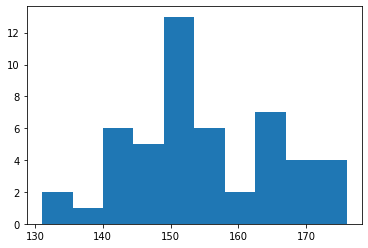

In [8]:
import matplotlib.pyplot as plt

plt.hist(mse_list)

When compared to our Step C model, we can see that by increasing the number of hidden layers our network to 3 has further improved our average MSE and has reduced the volitility as well across the training loops, as reflected by the lower average standard deviation.  